# Import neccessary dependencies


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc

# from imblearn.pipeline import Pipeline, make_pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# Load dataset

In [3]:
df = pd.read_csv('data01.csv')

# Data overview

In [4]:
len(df.columns.tolist())

51

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [6]:
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


# Data preprocessing

In [7]:
#drop the group and id column cos they are not neccessary

clean_data = df.drop(columns=['group', 'ID'])

In [8]:
clean_data.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,72,1,37.588179,0,0,0,1,1,0,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0.0,75,2,NaN,0,0,0,0,1,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0.0,83,2,26.572634,0,0,0,0,1,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0.0,43,2,83.264629,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0.0,75,2,31.824842,1,0,0,0,1,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


Currently all variables are numerical, including outcome. So let us cast that variable to categorical. The gender column has values of 1 and 2, for consistency let us use 0 and 1 values for it as well.

In [9]:
clean_data.dtypes

outcome                     float64
age                           int64
gendera                       int64
BMI                         float64
hypertensive                  int64
atrialfibrillation            int64
CHD with no MI                int64
diabetes                      int64
deficiencyanemias             int64
depression                    int64
Hyperlipemia                  int64
Renal failure                 int64
COPD                          int64
heart rate                  float64
Systolic blood pressure     float64
Diastolic blood pressure    float64
Respiratory rate            float64
temperature                 float64
SP O2                       float64
Urine output                float64
hematocrit                  float64
RBC                         float64
MCH                         float64
MCHC                        float64
MCV                         float64
RDW                         float64
Leucocyte                   float64
Platelets                   

In [10]:
# casting the gendera column to values of 0 and 1 instead of 1 and 2 for consistence seek.

clean_data['gendera'] = df['gendera'] - 1
clean_data.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,72,0,37.588179,0,0,0,1,1,0,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0.0,75,1,NaN,0,0,0,0,1,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0.0,83,1,26.572634,0,0,0,0,1,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0.0,43,1,83.264629,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0.0,75,1,31.824842,1,0,0,0,1,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [11]:
clean_data.shape

(1177, 49)

In [12]:
clean_data.isnull().sum()

outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophils                   259
Lymphocyte                  145
PT      

We can see that there is 1 row whose outcome is NA, we'll drop that row. The other columns that include NA values make up a significant amount, so we cannot drop those rows. On the other hand, those columns are very important for decision, so we cannot exclude the whole columns from the training process as well.

In [13]:
#dealing with the null values
clean_data[clean_data.isnull()['heart rate']].isnull().sum()

outcome                      1
age                          0
gendera                      0
BMI                          7
hypertensive                 0
atrialfibrillation           0
CHD with no MI               0
diabetes                     0
deficiencyanemias            0
depression                   0
Hyperlipemia                 0
Renal failure                0
COPD                         0
heart rate                  13
Systolic blood pressure     13
Diastolic blood pressure    13
Respiratory rate            13
temperature                 13
SP O2                       13
Urine output                13
hematocrit                   0
RBC                          0
MCH                          0
MCHC                         0
MCV                          0
RDW                          0
Leucocyte                    0
Platelets                    0
Neutrophils                  0
Basophils                    0
Lymphocyte                   0
PT                           0
INR     

We can observe from the above results, that for the rows having NA heart rate, the other vital signs are also NA. And as the number of rows is low, it's better to drop these rows.

In [14]:
clean_data = clean_data.dropna(subset=['heart rate'])
clean_data.isnull().sum()

outcome                       0
age                           0
gendera                       0
BMI                         208
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                    0
Systolic blood pressure       3
Diastolic blood pressure      3
Respiratory rate              0
temperature                   6
SP O2                         0
Urine output                 23
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophils                   259
Lymphocyte                  145
PT      

For the remaining missing values, let us replace them with a statistical metric, the column means specificall

In [15]:
clean_data = clean_data.fillna(clean_data.mean())
clean_data.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,72,0,37.588179,0,0,0,1,1,0,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0.0,75,1,30.189940,0,0,0,0,1,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0.0,83,1,26.572634,0,0,0,0,1,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0.0,43,1,83.264629,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0.0,75,1,31.824842,1,0,0,0,1,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


# EDA

In [16]:
clean_data.describe()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,...,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,0.135739,74.039519,0.526632,30.189940,0.717354,0.452749,0.083333,0.420103,0.338488,0.118557,...,138.906319,8.502840,102.290674,13.923373,2.121390,7.378532,26.920417,1.853426,45.535356,48.722509
std,0.342658,13.464075,0.499505,8.468460,0.450479,0.497976,0.276504,0.493787,0.473399,0.323405,...,4.147354,0.570618,5.316437,2.663190,0.251587,0.058693,5.176004,0.887770,11.069638,12.909146
min,0.000000,19.000000,0.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,0.000000,65.000000,0.000000,25.264054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,136.666667,8.150000,99.000000,12.228632,1.955556,7.350000,23.488636,1.300000,39.000000,40.000000
50%,0.000000,77.000000,1.000000,30.189940,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,139.258333,8.500000,102.500000,13.666667,2.093725,7.378532,26.472222,1.800000,45.535356,55.000000
75%,0.000000,85.000000,1.000000,32.116293,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,141.603846,8.870357,105.513889,15.404167,2.243254,7.410000,29.832386,2.025000,47.347222,55.000000
max,1.000000,99.000000,1.000000,104.970366,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


- From the data description above it is obvious that there is an imbalance in data in terms of outcome variable. Later we'll need to deal with this imbalance.
- The interquartile range of age is [65, 85], which is logical as the heart failure is more common among elderly patients.
- The gender column is balanced, number of male and female patients is almost equal (mean~0.53).
- The interquartile range of BMI is [~25, ~32]. Considering the fact that normal BMI is <25, and being overweight is a very serious risk factor for heart failure, these results are also expected.
- The other binary columns indicating imbalance are CHD with no MI (most of the patients didn't have heart attack at the time of admission) and depression (most of the patients had depression at the time of admission, again very important risk factor for HF).

<Axes: xlabel='outcome', ylabel='count'>

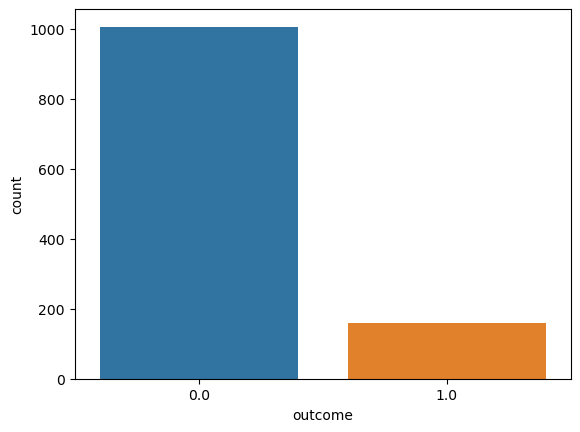

In [17]:
sns.countplot(data=clean_data, x="outcome")

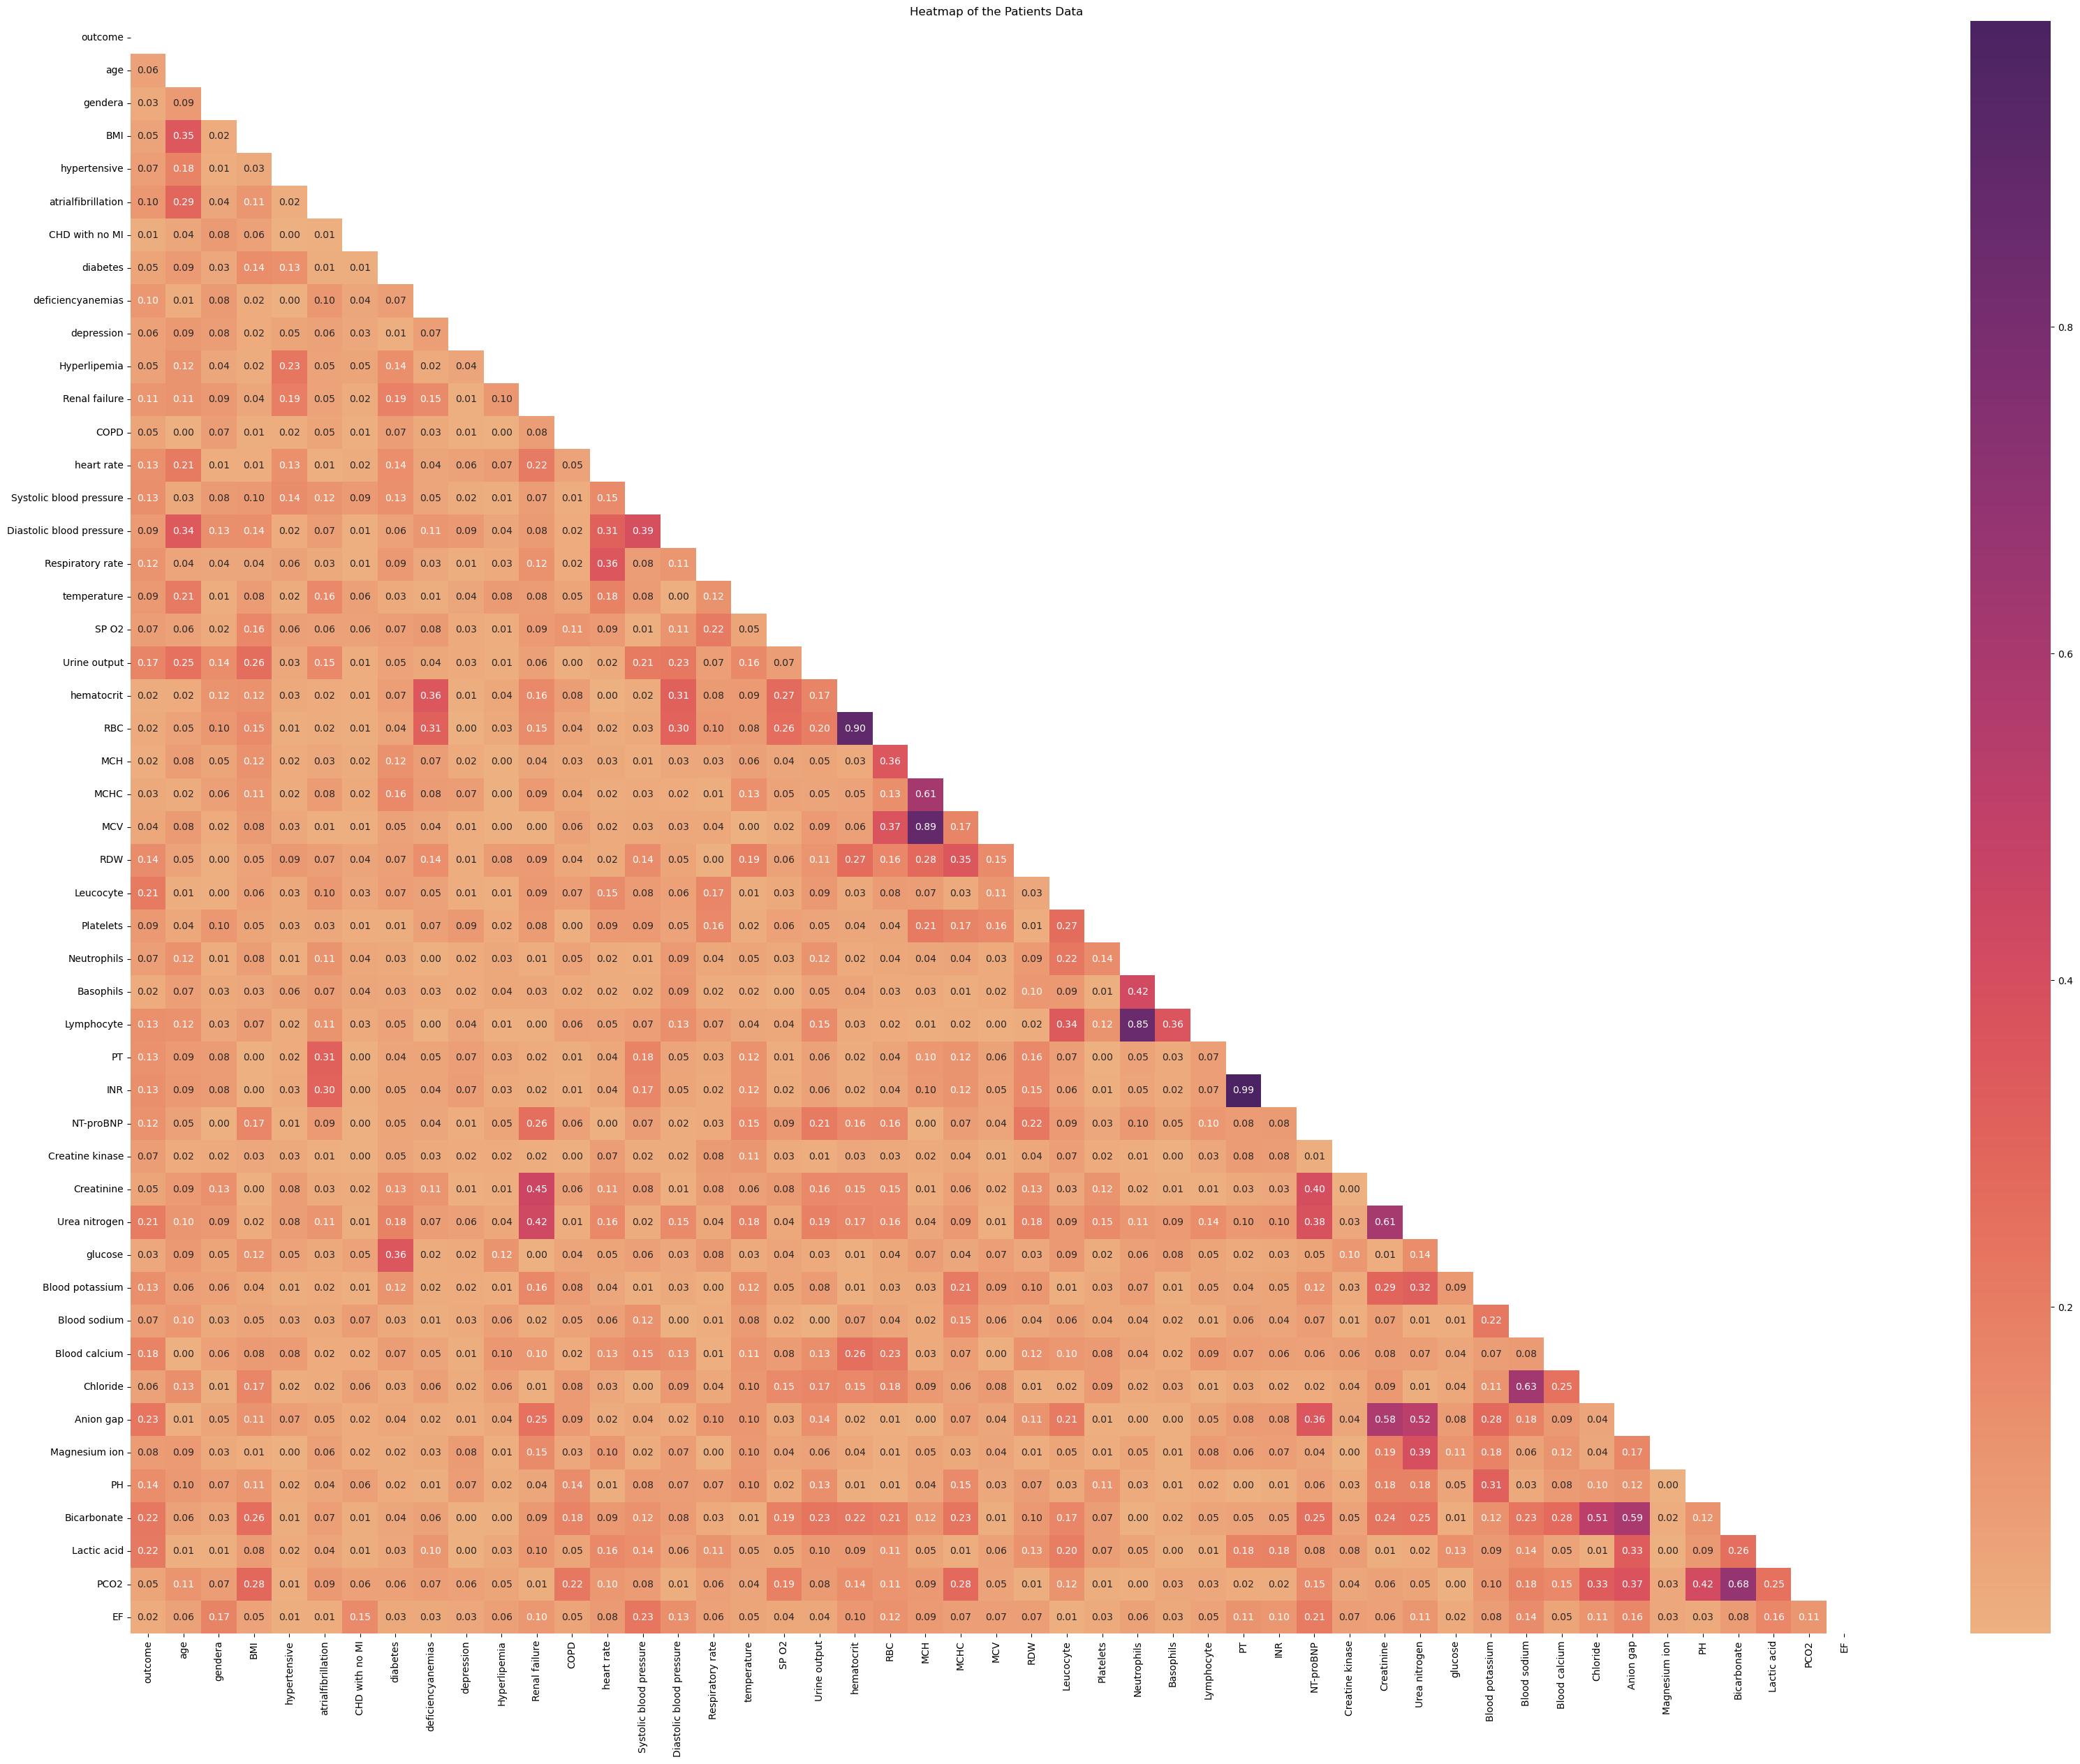

In [18]:
corr_matrix = np.abs(clean_data.corr())
mask = np.triu(np.ones_like(corr_matrix) > 0)

plt.figure(figsize = (40, 30))
sns.heatmap(corr_matrix, mask=mask, cmap='flare', annot=True, fmt='.2f')
plt.title('Heatmap of the Patients Data')
plt.show()

From the heatmap above we can see very strong correlations between these pairs:

RBC and hematocrit
MCV and MCH
Lymphocyte and Neutrophils
INR and PT
For cleaning the linear dependencies, we are going to drop one of the columns for each pair.

In [19]:
clean_data = clean_data.drop(['hematocrit', 'MCH', 'Neutrophils', 'PT'], axis=1)


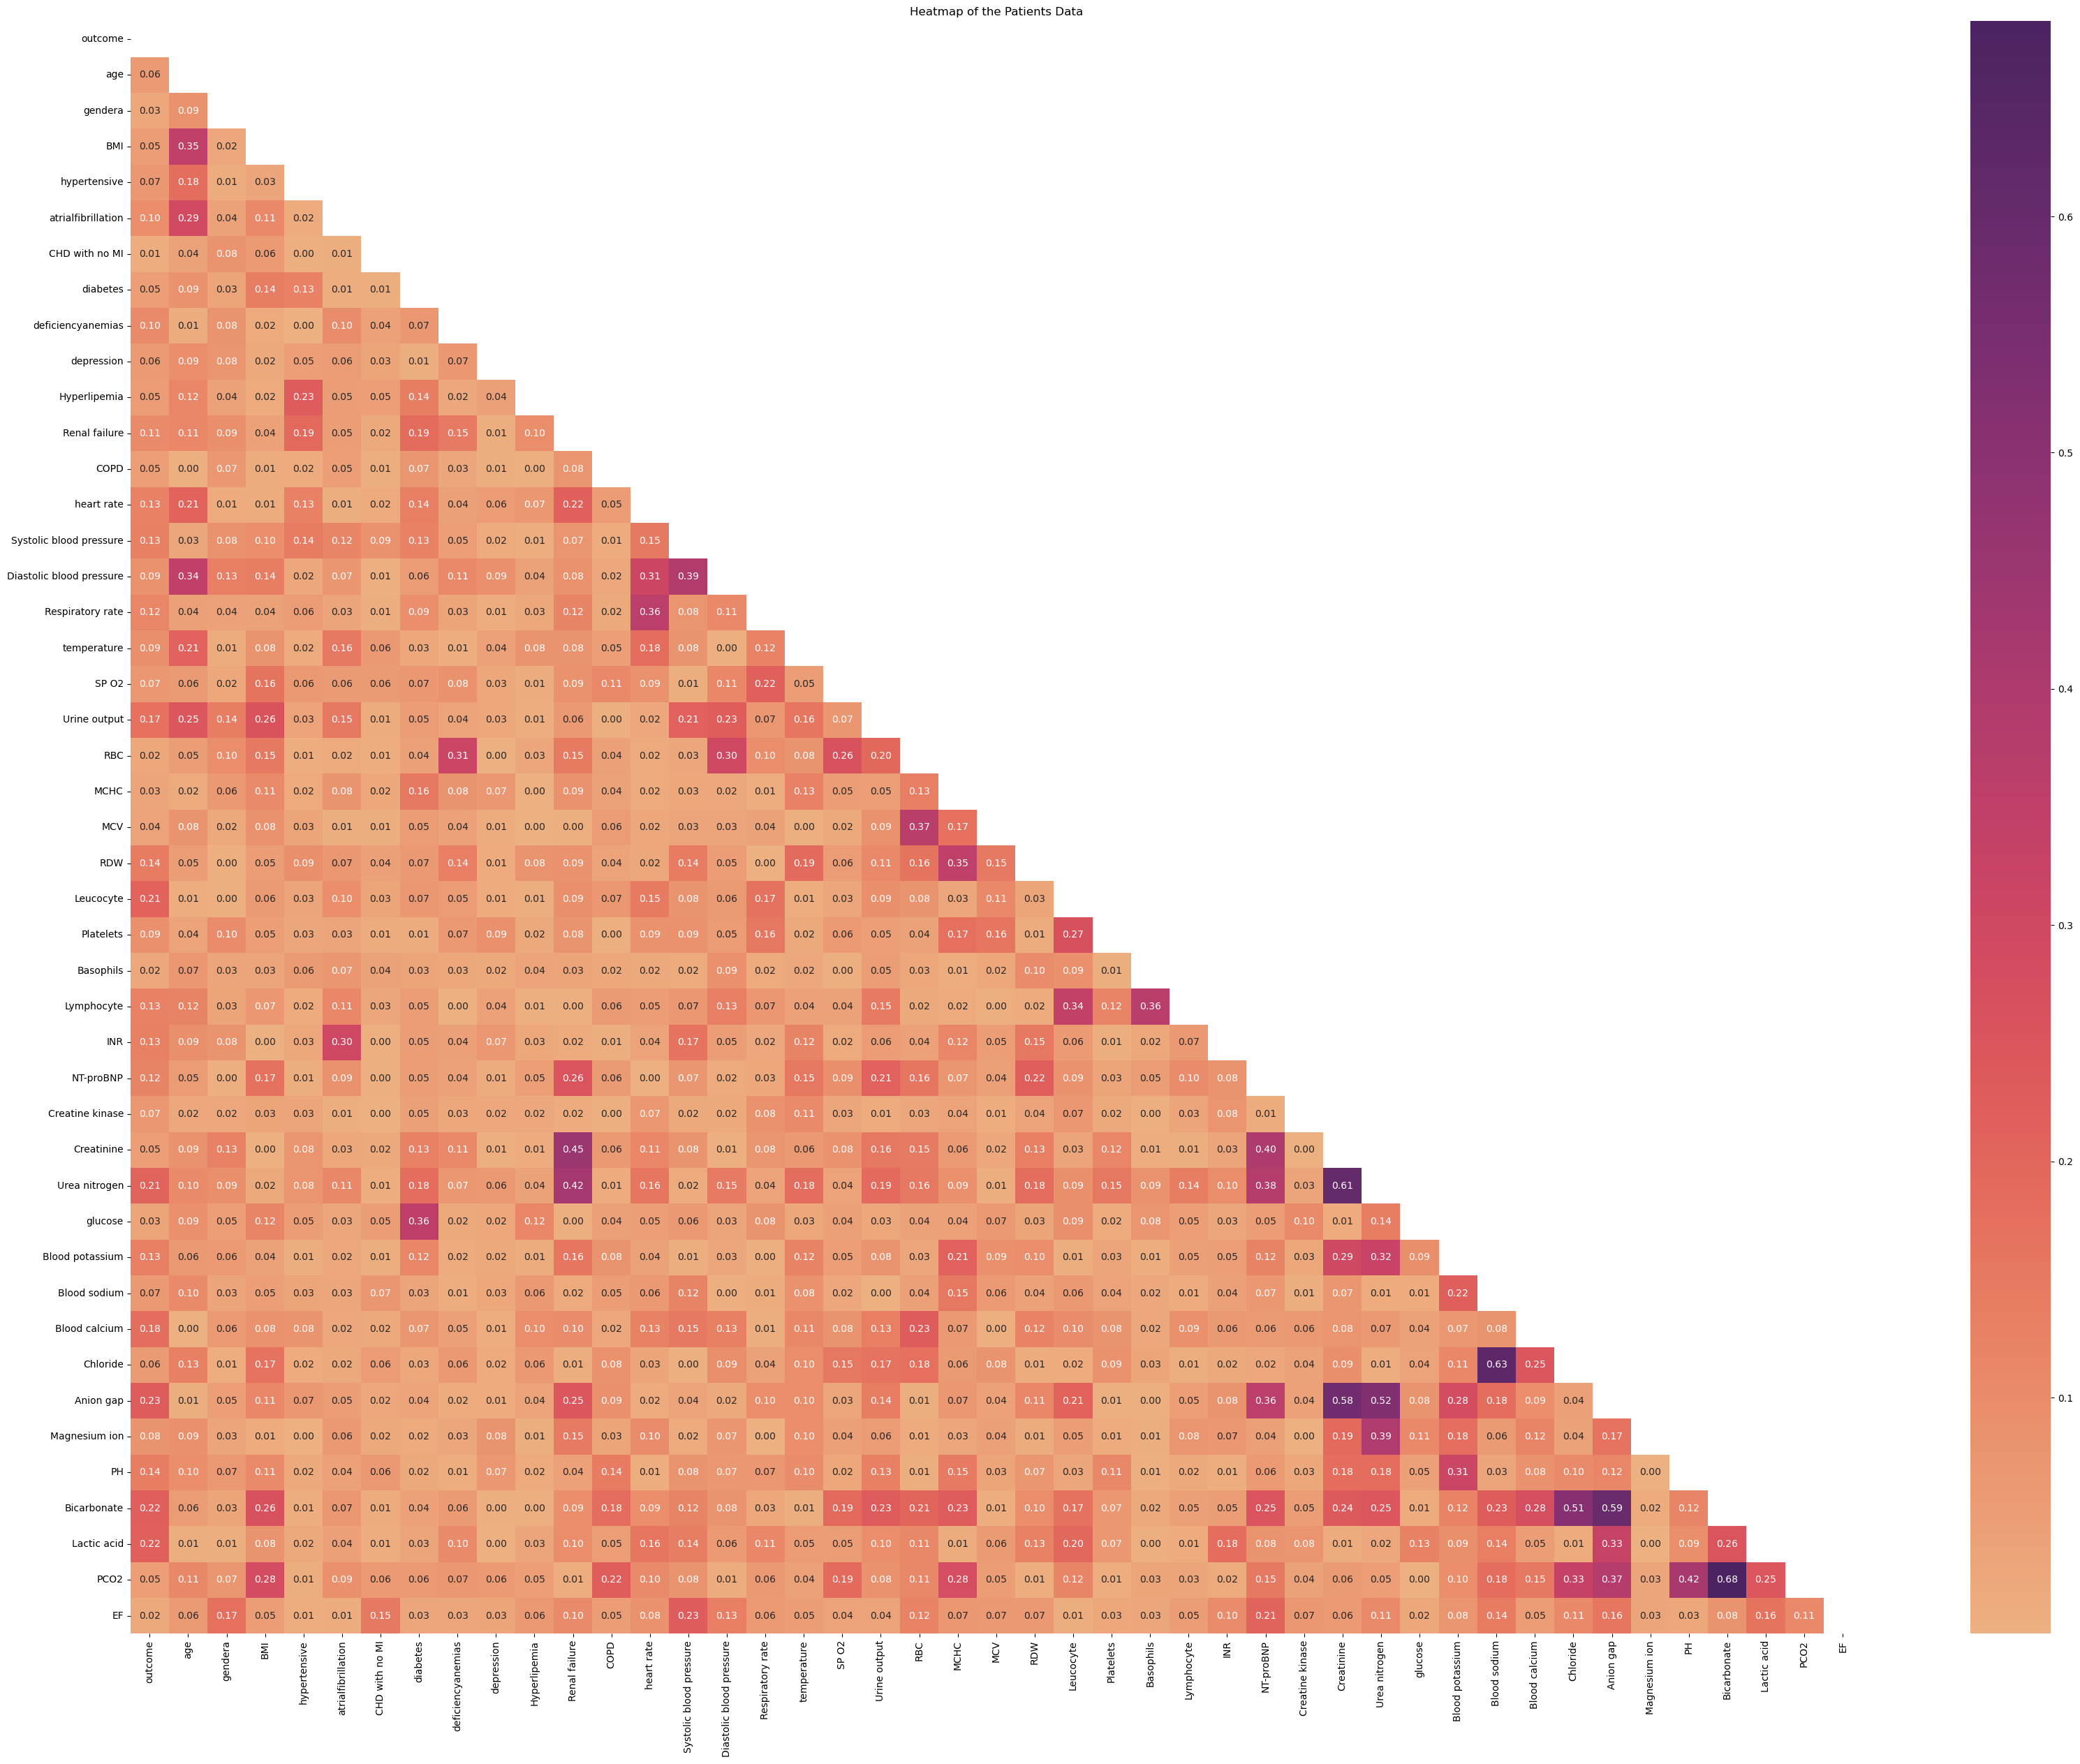

In [20]:
corr_matrix = np.abs(clean_data.corr())
mask = np.triu(np.ones_like(corr_matrix) > 0)

plt.figure(figsize = (40, 30))
sns.heatmap(corr_matrix, mask=mask, cmap='flare', annot=True, fmt='.2f')
plt.title('Heatmap of the Patients Data')
plt.show()

# Data spliting for model training and evaluation

In [21]:
X = clean_data.iloc[:, 1:]
y = clean_data.iloc[:, 0]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=clean_data['outcome'])

In [22]:
def evaluate(gt, pred):
    print("Precision : ", precision_score(gt, pred, average = 'micro'))
    print("Recall : ", recall_score(gt, pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(gt, pred))
    print("F1 Score : ", f1_score(gt, pred, average = 'micro'))

In [23]:
def roc_auc(model, real_X, real_y):
    y_scores = model.predict_proba(real_X)[:, 1]
    fpr, tpr, thresholds = roc_curve(real_y, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    sns.lineplot(x=fpr, y=tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--', color='navy')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


Training a Gradient Boosting algorithm

In [24]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

In [25]:
evaluate(y_test, y_pred_gb)

Precision :  0.8583690987124464
Recall :  0.8583690987124464
Accuracy :  0.8583690987124464
F1 Score :  0.8583690987124464


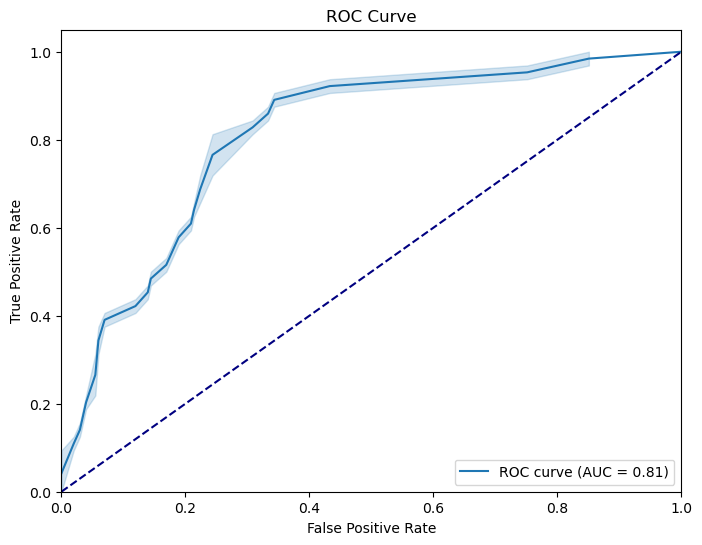

In [26]:
roc_auc(gb_model, X_test, y_test)

In [27]:
import pickle
# Save the model to a file using pickle
with open('mortality_prediction_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

In [34]:
!pip freeze > requirements.txt

In [28]:
from joblib import dump, load
# Save the model to a file
model_filename = "mortality_prediction_model.pkl"
dump(gb_model, model_filename)
print("Model saved to", model_filename)

# Load the model from the file
# loaded_model = load(model_filename)

Model saved to mortality_prediction_model.pkl


In [29]:
# Load the model from the file
loaded_model = load(model_filename)

Random forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [ ]:
evaluate(y_test, y_pred_rf)

Precision :  0.8669527896995708
Recall :  0.8669527896995708
Accuracy :  0.8669527896995708
F1 Score :  0.8669527896995708
